In [1]:
import netCDF4 as nc
import numpy as np
import scipy
import os
import matplotlib
# matplotlib.rcParams['backend'] = "Qt4Agg"
# matplotlib.rcParams['legend.numpoints'] = 1

from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.lines as mlines

import matplotlib.gridspec as gridspec

# WT
import scipy.io as sio

In [18]:
run -i extract_T_irr.py

In [58]:
run -i spatialplot.py

In [3]:
t_res = 'seasonal'
yr_start1 = 1901
yr_end1 = 1930
yr_start2 = 1981
yr_end2 = 2010

In [59]:
T_out_CRUv3 = extract_T_irr('CRU_CESM','tmx_max','PD',t_res,yr_start1,yr_end1,yr_start2,yr_end2)

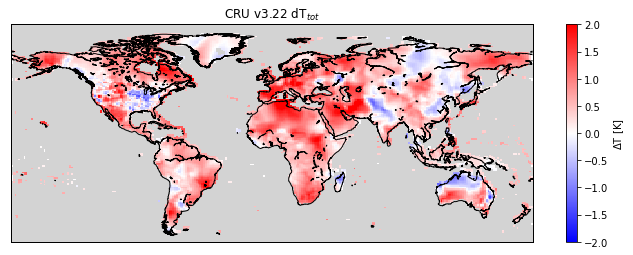

In [60]:
spatialplot(m,T_out_CRUv3[1,30:,:] - T_out_CRUv3[0,30:,:],-2,2,'CRU v3.22 dT$_{tot}$')

In [61]:
T_out_CRUv4 = extract_T_irr('CRUv4_CESM','tmx_max','PC/PD',t_res,yr_start1,yr_end1,yr_start2,yr_end2)

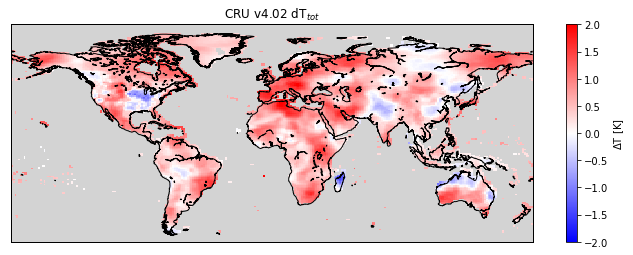

In [62]:
spatialplot(m,T_out_CRUv4[1,30:,:] - T_out_CRUv4[0,30:,:],-2,2,'CRU v4.02 dT$_{tot}$')

In [36]:
print np.nanpercentile(T_out_CRUv3[1,30:,:] - T_out_CRUv3[0,30:,:],10), np.nanpercentile(T_out_CRUv3[1,30:,:] - T_out_CRUv3[0,30:,:],90)
print np.nanpercentile(T_out_CRUv4[1,30:,:] - T_out_CRUv4[0,30:,:],10), np.nanpercentile(T_out_CRUv4[1,30:,:] - T_out_CRUv4[0,30:,:],90)

-0.10714425759253565 1.2776437338704483
-0.005901336669921875 1.156662940979004


In [17]:
run -i calc_irr_diff.py

In [24]:
lats,lons,f_irr = calc_irr_diff('CRU_CESM','PD',1901,1930,1981,2010)

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


In [25]:
print np.count_nonzero(~np.isnan(f_irr)), np.count_nonzero(~np.isnan(T_out_BE))

32990 39937


In [40]:
run -i calc_irr_impact_regr.py

In [13]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='l')

## Berkeley at CESM resolution

In [65]:
dT_irr_CRUv3, _,_,_,_ = calc_irr_impact_regr('CRU_CESM','tmx_max','PC/PD','seasonal',0.1,False,1901,1930,1981,2010)

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction


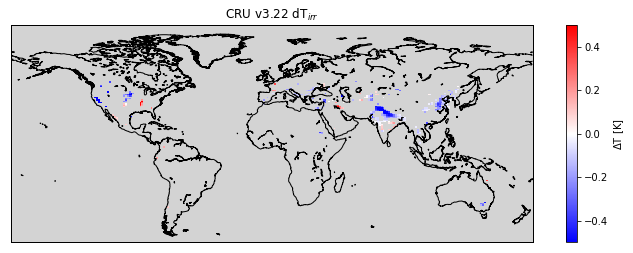

In [66]:
spatialplot(m,dT_irr_CRUv3[30:,:],-0.5,0.5,'CRU v3.22 dT$_{irr}$')

## CRU at CESM resolution

In [67]:
dT_irr_CRUv4, _,_,_,_ = calc_irr_impact_regr('CRUv4_CESM','tmx_max','PC/PD','seasonal',0.1,False,1901,1930,1981,2010)

/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction


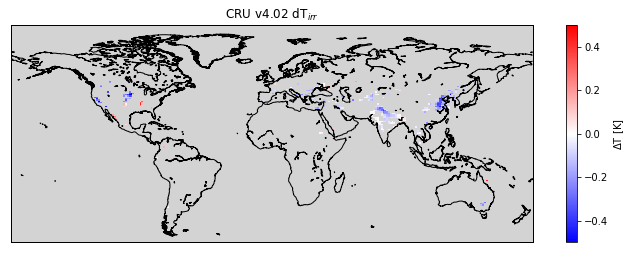

In [68]:
spatialplot(m,dT_irr_CRUv4[30:,:],-0.5,0.5,'CRU v4.02 dT$_{irr}$')

## CESM

In [84]:
dT_irr, _,_,_,_ = calc_irr_impact_regr('CESM','TREFHTMX','PD','seasonal',0.02,False,1901,1930,1981,2010)

Done importing changes in temperature and irrigated fraction


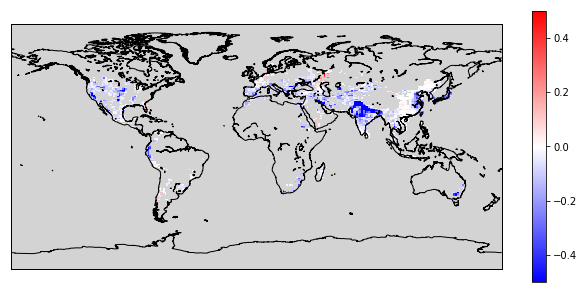

In [85]:
spatialplot(m,dT_irr,-0.5,0.5)